Fraude deteccao || modelos compararao

#### Bibliotecas

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Dropout
pd.set_option('display.float_format', lambda x: '%.2f' %x)


#### exportacao data base

In [4]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


### analise nulos e tipos de colunas

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Estatisticas descritivas

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


### percentual de fraude

In [7]:
no_fraude = len(data[data.Class == 0])
fraude = len(data[data.Class == 1])
fraude_percentual = (fraude / (fraude + no_fraude)) *100
print('Numeros de transacoes genuinas: ', no_fraude)
print('Numeros de transacoes com fraude: ', fraude)
print('Percentua de fraude por transacoes: {:.2f}'.format(fraude_percentual))

Numeros de transacoes genuinas:  284315
Numeros de transacoes com fraude:  492
Percentua de fraude por transacoes: 0.17


### grafico de fraude vs genuino

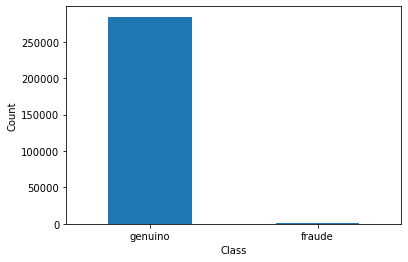

In [8]:
labels = ['genuino', 'fraude']
c_classes = data.value_counts(data['Class'],sort=True)
c_classes.plot(kind='bar', rot = 0)
plt.ylabel('Count')
plt.xticks(range(2), labels)
plt.show()


### scaling features

In [9]:

rs = RobustScaler()
data['scaled_amount'] = rs.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rs.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time', 'Amount'], axis=1, inplace=True)
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(0, 'scaled_time', scaled_time)
data.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.99,1.78,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,...,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,0
1,-0.99,-0.27,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,...,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,0
2,-0.99,4.98,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,...,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,0
3,-0.99,1.42,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,...,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,0
4,-0.99,0.67,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,...,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,0


### modelo sem SMOTE


In [10]:
x = data.drop(["Class"], axis= 1)
y = data["Class"]
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size= 0.2, random_state= 42)
print("Shape of train_X: ", x_train.shape)
print("Shape of test_X: ", x_test.shape)

Shape of train_X:  (227845, 30)
Shape of test_X:  (56962, 30)


### metricas e resultados

In [11]:
def metricas(actuals, predictions):
    print("Accuracy: {:.2f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.2f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.2f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.2f}".format(f1_score(actuals, predictions)))
    
def resultado (model, x_train, y_train, x_test, y_test):
    x = model()
    x.fit(x_train, y_train)
    y_pred = x.predict(x_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print()
    metricas(y_test, y_pred.round())
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Atual ')
    plt.xlabel('Previsto ')


Avalicao do BaggingClassifier sem SMOTE

Accuracy: 1.00
Precision: 0.94
Recall: 0.80
F1-score: 0.86


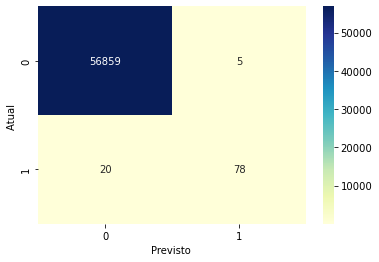

In [12]:
print('Avalicao do BaggingClassifier sem SMOTE')
resultado(BaggingClassifier, x_train, y_train, x_test, y_test)

Avalicao do RandomForestClassifier sem SMOTE

Accuracy: 1.00
Precision: 0.96
Recall: 0.78
F1-score: 0.86


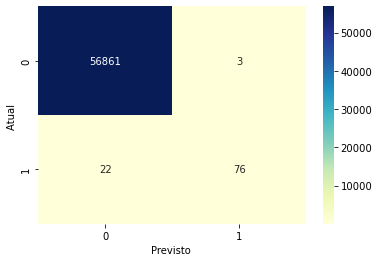

In [13]:
print('Avalicao do RandomForestClassifier sem SMOTE')

resultado(RandomForestClassifier, x_train, y_train, x_test, y_test)

Avaliacao do AdaBoostClassifier antes do SMOTE

Accuracy: 1.00
Precision: 0.86
Recall: 0.72
F1-score: 0.78


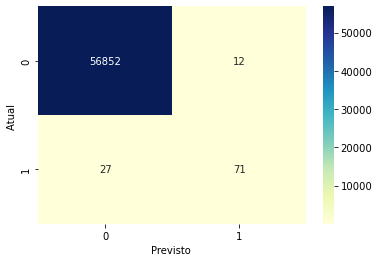

In [14]:
print('Avaliacao do AdaBoostClassifier antes do SMOTE')

resultado(AdaBoostClassifier, x_train, y_train, x_test, y_test)

### SMOTE

Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 227451 

After OverSampling, the shape of train_x: (454902, 30)
After OverSampling, the shape of train_y: (454902,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


<AxesSubplot:xlabel='Class', ylabel='count'>

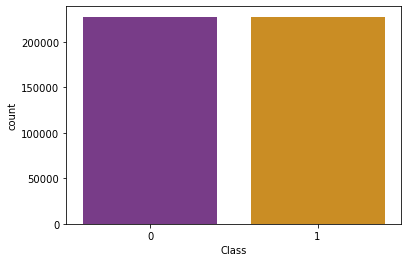

In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train)

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=data, palette='CMRmap')

### modelos com SMOTE

In [18]:
def result (model, x_train, y_train, x_test, y_test):
    x = model()
    x.fit(x_train, y_train)
    y_pred = x.predict(x_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print()
    metricas(y_test, y_pred.round())

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    y_pred_prob = x.predict_proba(x_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()

Avalicao BaggingClassifier com SMOTE

Accuracy: 1.00
Precision: 0.68
Recall: 0.81
F1-score: 0.73


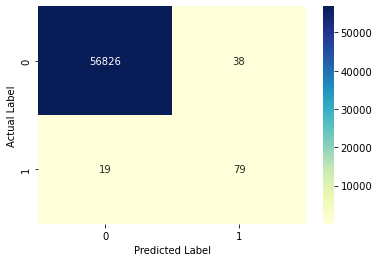

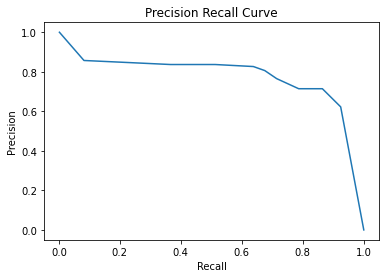

In [19]:
print('Avalicao BaggingClassifier com SMOTE')
result(BaggingClassifier, x_train_s, y_train_s, x_test, y_test)

Avaliacao do DecisionTreeClassifier com SMOTE

Accuracy: 1.00
Precision: 0.41
Recall: 0.78
F1-score: 0.53


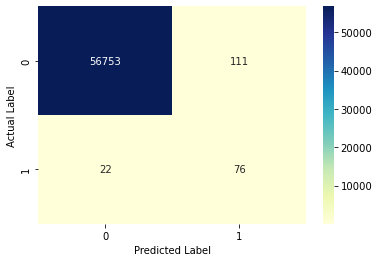

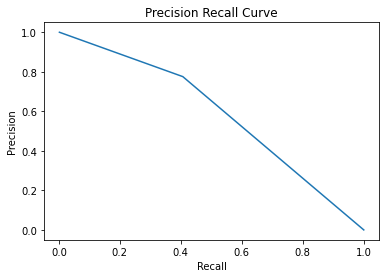

In [20]:
print('Avaliacao do DecisionTreeClassifier com SMOTE')
result(DecisionTreeClassifier, x_train_s, y_train_s, x_test, y_test)

Avaliacao do RandomForestClassifier com SMOTE

Accuracy: 1.00
Precision: 0.89
Recall: 0.85
F1-score: 0.87


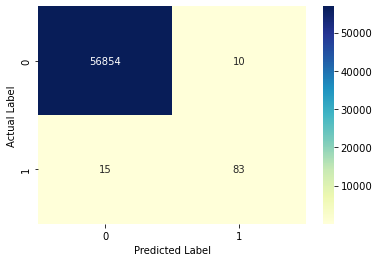

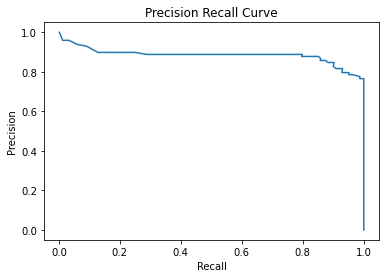

In [21]:
print('Avaliacao do RandomForestClassifier com SMOTE')
result(RandomForestClassifier, x_train_s, y_train_s, x_test, y_test)

Feature importance ranking


1.V14(0.161470)
2.V4(0.117620)
3.V10(0.109158)
4.V12(0.108840)
5.V11(0.108163)
6.V17(0.078388)
7.V16(0.041364)
8.V3(0.040846)
9.V2(0.038033)
10.V7(0.019983)
11.V9(0.014912)
12.V8(0.014131)
13.V27(0.013799)
14.scaled_amount(0.013594)
15.V1(0.012770)
16.V18(0.012313)
17.V5(0.011021)
18.V21(0.009534)
19.V19(0.007941)
20.V26(0.007506)
21.V20(0.007122)
22.V6(0.006911)
23.scaled_time(0.006642)
24.V13(0.006415)
25.V15(0.005794)
26.V25(0.005696)
27.V24(0.005607)
28.V28(0.005348)
29.V23(0.004983)
30.V22(0.004098)


<BarContainer object of 30 artists>

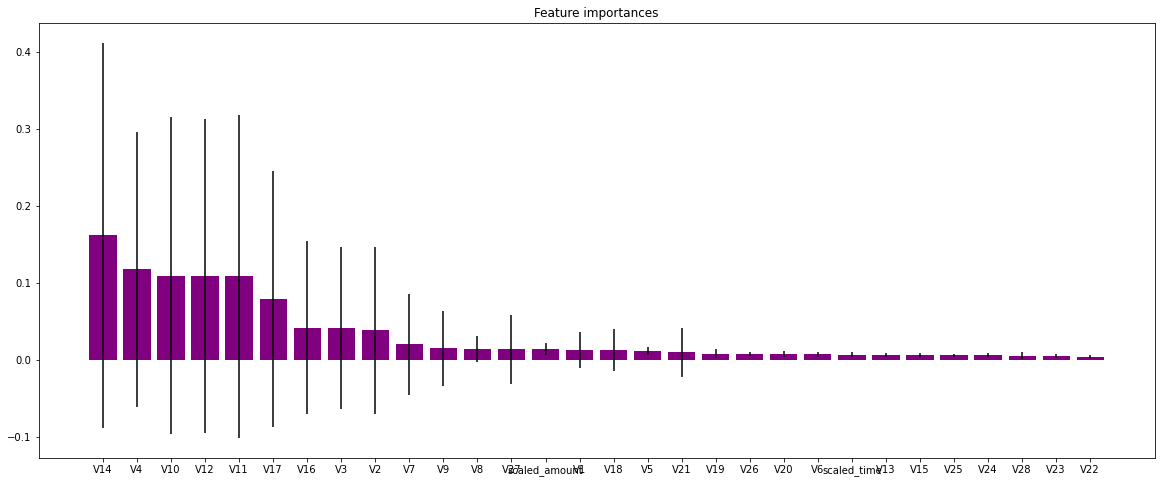

In [22]:
print('Feature importance ranking\n\n')
rf= RandomForestClassifier()
rf.fit(x_train_s, y_train_s)
y_pred = rf.predict(x_test)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = data.columns
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))
plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="purple", yerr=std[indices], align='center')

Avaliacao do AdaBoostClassifier com SMOTE

Accuracy: 0.98
Precision: 0.06
Recall: 0.94
F1-score: 0.12


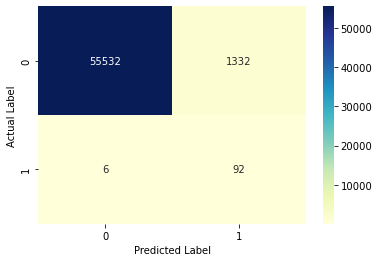

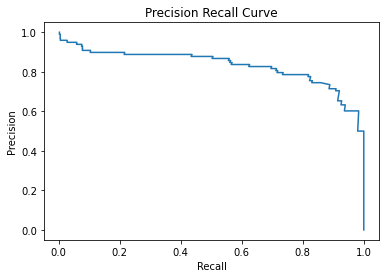

In [23]:
print('Avaliacao do AdaBoostClassifier com SMOTE')
result(AdaBoostClassifier, x_train_s, y_train_s, x_test, y_test)

### rede neural


In [24]:
n_inputs = x_train_s.shape[1]

In [31]:
model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')])
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_s, y_train_s, validation_split=0.2, batch_size=300, epochs=25, shuffle=True, verbose=2)

Epoch 1/25


2022-03-13 14:56:05.176386: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1214/1214 - 2s - loss: 0.0758 - accuracy: 0.9721 - val_loss: 0.0367 - val_accuracy: 0.9873 - 2s/epoch - 1ms/step
Epoch 2/25
1214/1214 - 1s - loss: 0.0166 - accuracy: 0.9960 - val_loss: 0.0078 - val_accuracy: 0.9996 - 1s/epoch - 923us/step
Epoch 3/25
1214/1214 - 2s - loss: 0.0080 - accuracy: 0.9983 - val_loss: 0.0050 - val_accuracy: 0.9998 - 2s/epoch - 1ms/step
Epoch 4/25
1214/1214 - 2s - loss: 0.0054 - accuracy: 0.9989 - val_loss: 0.0047 - val_accuracy: 0.9999 - 2s/epoch - 1ms/step
Epoch 5/25
1214/1214 - 2s - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0014 - val_accuracy: 1.0000 - 2s/epoch - 1ms/step
Epoch 6/25
1214/1214 - 1s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0017 - val_accuracy: 1.0000 - 1s/epoch - 1ms/step
Epoch 7/25
1214/1214 - 1s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0013 - val_accuracy: 1.0000 - 1s/epoch - 1ms/step
Epoch 8/25
1214/1214 - 1s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 6.4328e-04 - val_accuracy: 1.0000 - 1s/epoch - 1ms/step
Epoch 9/25
12

<AxesSubplot:>

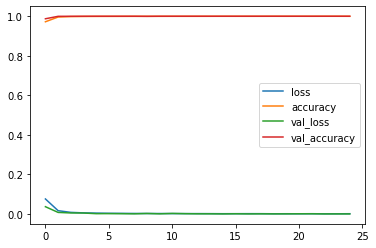

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [33]:
score = model.evaluate(x_test, y_test)
print(score)

1781/1781 [==============================] - 1s 632us/step - loss: 0.0146 - accuracy: 0.9986
[0.014609189704060555, 0.9986482262611389]


Evaluation of Neural Network Model After SMOT

Accuracy: 1.00
Precision: 0.57
Recall: 0.84
F1-score: 0.68


Text(0.5, 15.0, 'Predicted Label')

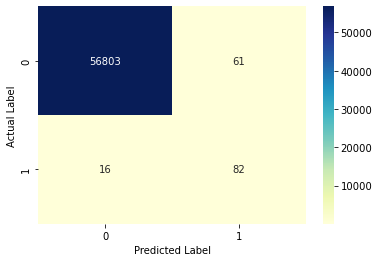

In [35]:
y_pred= np.argmax(model.predict(x_test), axis=-1) 
print('Avaliacao da rede neural com SMOT')
print()
metricas(y_test, y_pred.round())
nn_f1_score = f1_score(y_test, y_pred)
nn_cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(nn_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Conclusao

In [ ]:
# A implementação da técnica SMOTE em nosso conjunto de dados nos ajudou a equilibrar os dados.
# Após comparação entre os modelos, descobrimos que RandomForestClassifier (antes e depois) SMOTE nos deu o melhor resultado.